# Agregados. (Verticalización y Normalización)

In [2]:
import os
import pandas as pd

In [ ]:
os.chdir(r"/content/sample_data")
SalePrice=pd.read_csv("SalePrice.csv")

In [3]:
SalePrice = pd.read_csv(r"C:\americo\ia_dema\05_Agregados_y_verticalización\SalePrice.csv", sep=",", encoding="UTF-8")


In [4]:
SalePrice.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
SalePrice.shape

(1459, 80)

# Detección de columnas categóricas.

Puedo ver cuantas variables categóricas tengo.

Podemos aplicar cualquier función columna por columna usando `apply`.

En este caso deseamos que nos devuelva el número de valores únicos de cada columna x. Usando una función anónima

In [6]:
val_unicos = SalePrice.apply(lambda x: len(x.unique()))


In [7]:
val_unicos

Id               1459
MSSubClass         16
MSZoning            6
LotFrontage       116
LotArea          1106
                 ... 
MiscVal            26
MoSold             12
YrSold              5
SaleType           10
SaleCondition       6
Length: 80, dtype: int64

O usando una función con nombre.

In [8]:
def val_unicos(columna):
    return columna.nunique()

In [9]:
val_unicos = SalePrice.apply(val_unicos)


In [10]:
val_unicos

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       115
LotArea          1106
                 ... 
MiscVal            26
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 80, dtype: int64

Aunque ya existe una función específica en pandas para esto

In [11]:
val_unicos = SalePrice.nunique()



In [12]:
val_unicos

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       115
LotArea          1106
                 ... 
MiscVal            26
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 80, dtype: int64

- Sin embargo, existe una diferencia. El primer método (unique) incluye `nan` 

   como una de las categorías posibles en cambio nunique no.

- Puesto que el resultado es una serie, puedo filtrar los valores. Si el número 
 
   de valores únicos es inferior, digamos, a 10, considero que esa columna es categórica.

In [13]:
val_unicos[val_unicos < 10]

MSZoning         5
Street           2
Alley            2
LotShape         4
LandContour      4
Utilities        1
LotConfig        5
LandSlope        3
Condition1       9
Condition2       5
BldgType         5
HouseStyle       7
OverallCond      9
RoofStyle        6
RoofMatl         4
MasVnrType       3
ExterQual        4
ExterCond        5
Foundation       6
BsmtQual         4
BsmtCond         4
BsmtExposure     4
BsmtFinType1     6
BsmtFinType2     6
Heating          4
HeatingQC        5
CentralAir       2
Electrical       4
BsmtFullBath     4
BsmtHalfBath     3
FullBath         5
HalfBath         3
BedroomAbvGr     7
KitchenAbvGr     3
KitchenQual      4
Functional       7
Fireplaces       5
FireplaceQu      5
GarageType       6
GarageFinish     3
GarageCars       6
GarageQual       4
GarageCond       5
PavedDrive       3
PoolArea         7
PoolQC           2
Fence            4
MiscFeature      3
YrSold           5
SaleType         9
SaleCondition    6
dtype: int64

Ahora puedo ver cómo están distribuidos esos valores únicos.

<Axes: xlabel='MSZoning'>

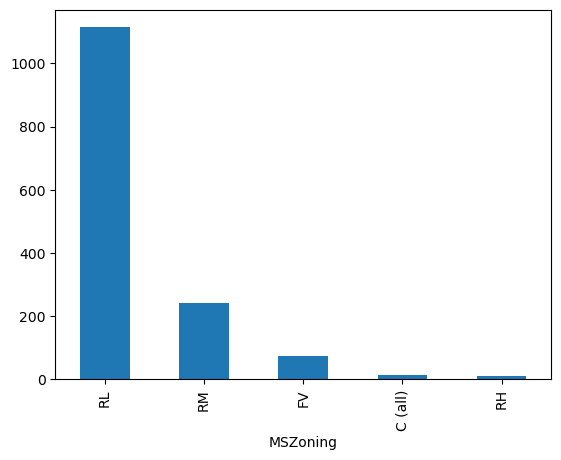

In [14]:
SalePrice["MSZoning"].value_counts().plot(kind = "bar")

<Axes: >

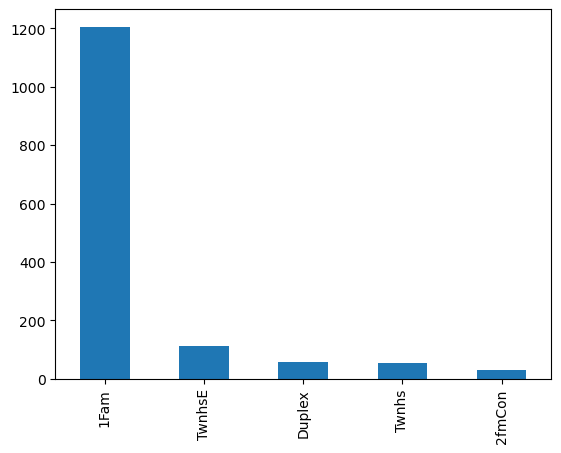

In [14]:
SalePrice["BldgType"].value_counts().plot(kind = "bar")

# Agregaciones

In [15]:
ZonaConteo = SalePrice.groupby('MSZoning').agg(len).reset_index()


In [16]:
ZonaConteo

,MSZoning,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,C (all),15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
1,FV,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
2,RH,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,RL,1114,1114,1114,1114,1114,1114,1114,1114,1114,...,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114
4,RM,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242


Tambien podemos realizar el sumatorio.

Si incluimos todas las variables, las de tipo String darán resultados no deseados.

Si en lugar de `sum` hubiéramos usado `mean`, el cálculo sería imposible.

In [17]:
ZonaSuma = SalePrice.groupby('MSZoning').agg("sum").reset_index()


In [18]:
ZonaSuma

,MSZoning,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,C (all),34590,940,812.0,113005,PaveGrvlPavePavePavePavePaveGrvlPavePavePavePa...,Grvl,IR1RegRegRegRegRegRegRegRegRegRegRegRegRegReg,LvlLvlLvlLvlLvlLvlLvlBnkLvlLvlLvlLvlLvlLvlBnk,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,...,0,0,0,0,0,0,106,30116,WDWDWDWDWDWDWDWDWDWDWDConLDWDWDWD,AbnormlAllocaNormalAbnormlNormalNormalNormalNo...
1,FV,150988,6540,3693.0,478835,PavePavePavePavePavePavePavePavePavePavePavePa...,PavePavePavePavePavePavePavePavePavePavePavePa...,RegRegIR1RegRegRegRegRegIR1IR1IR1RegRegRegRegI...,LvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlL...,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,...,744,0,0,GdPrv,0,0,463,148595,NewWDWDWDConLDWDWDWDWDNewWDWDWDWDWDNewWDWDWDWD...,PartialNormalNormalNormalNormalNormalNormalNor...
2,RH,19555,1050,509.0,77087,PavePavePavePavePavePavePavePavePavePave,PavePave,RegIR1RegRegRegRegIR1IR2IR2Reg,LvlLvlLvlLvlLvlLvlLvlLvlLvlBnk,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,...,120,0,0,MnPrv,Shed,500,64,20085,WDWDWDCODWDWDWDWDWDWD,NormalNormalNormalNormalNormalAbnormlNormalNor...
3,RL,2444600,55020,67327.0,11979696,PavePavePavePavePavePavePavePavePavePavePavePa...,PaveGrvlGrvlGrvlGrvlGrvlGrvlGrvlPaveGrvlGrvlGr...,IR1IR1IR1IR1IR1IR1IR1RegRegRegRegIR1IR1RegIR1R...,LvlLvlLvlHLSLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlH...,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,...,21346,2545,ExExGd,MnPrvGdPrvMnPrvGdPrvGdWoGdPrvGdWoMnPrvGdPrvGdW...,Gar2ShedShedShedShedShedShedShedShedShedShedSh...,78067,6827,2236617,WDWDWDWDWDWDWDWDWDWDWDNewNewWDWDWDWDWDWDWDWDWD...,NormalNormalNormalNormalNormalNormalNormalNorm...
4,RM,536188,20025,11836.0,1553319,PavePavePavePavePavePavePavePavePavePavePavePa...,GrvlGrvlGrvlGrvlGrvlGrvlGrvlGrvlGrvlGrvlGrvlGr...,RegRegRegRegRegRegRegRegRegRegRegRegRegRegRegR...,LvlLvlLvlLvlBnkLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlL...,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,...,2687,0,0,MnPrvMnPrvMnPrvMnPrvMnPrvGdPrvGdPrvMnPrvMnPrvM...,ShedShedShedGar2,6300,1435,485892,CODWDCODWDWDWDWDWDWDWDWDWDWDWDWDWDWDWDWDWDWDWD...,NormalNormalAbnormlNormalNormalNormalNormalNor...


Solo incluye variables numericas.

In [19]:
SalePrice_num = SalePrice.select_dtypes(["number", "bool"])


In [20]:
# Necesito recuperar la columna categórica con la que hago el agregado
SalePrice_num["MSZoning"] = SalePrice["MSZoning"]

In [21]:
ZonaSuma = SalePrice_num.groupby('MSZoning').agg("sum").reset_index()


In [22]:
ZonaSuma

,MSZoning,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),34590,940,812.0,113005,59,80,28775,29444,0.0,...,2062.0,154,666,1133,86,0,0,0,106,30116
1,FV,150988,6540,3693.0,478835,542,370,148274,148302,8381.0,...,42806.0,4976,8234,36,224,744,0,0,463,148595
2,RH,19555,1050,509.0,77087,55,54,19640,19728,88.0,...,4386.0,852,416,135,0,120,0,500,64,20085
3,RL,2444600,55020,67327.0,11979696,6909,6137,2201954,2211230,124033.0,...,555838.0,117792,53696,21840,1556,21346,2545,78067,6827,2236617
4,RM,536188,20025,11836.0,1553319,1295,1449,469855,477657,12922.0,...,82880.0,12049,7454,12092,752,2687,0,6300,1435,485892


In [23]:
SalePrice_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning'],
      dtype='object')

Puedo asignar una función de agregación distinta a cada columna de datos.

In [26]:
dict_calculos = {'YearBuilt': 'mean',
                 'OverallQual': 'mean',
                 'LotArea': 'sum'}


In [27]:
ZonaSuma = SalePrice_num.groupby('MSZoning').agg(dict_calculos).reset_index()


In [28]:
ZonaSuma

,MSZoning,YearBuilt,OverallQual,LotArea
0,C (all),1918.333333,3.933333,113005
1,FV,2003.702703,7.324324,478835
2,RH,1964.000000,5.500000,77087
3,RL,1976.619390,6.201975,11979696
4,RM,1941.549587,5.351240,1553319


Vamos a definir una función personalizada que en lugar de sumar los valores suma el módulo de los valores

In [29]:
serie = pd.Series([0, 1, -2, 3])


In [30]:
serie.abs().sum()

6

In [31]:
def suma_mod(serie):
    return serie.abs().sum()

In [32]:
ZonaSuma = SalePrice_num.groupby('MSZoning').agg(suma_mod).reset_index()


In [33]:
ZonaSuma

,MSZoning,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),34590,940,812.0,113005,59,80,28775,29444,0.0,...,2062.0,154,666,1133,86,0,0,0,106,30116
1,FV,150988,6540,3693.0,478835,542,370,148274,148302,8381.0,...,42806.0,4976,8234,36,224,744,0,0,463,148595
2,RH,19555,1050,509.0,77087,55,54,19640,19728,88.0,...,4386.0,852,416,135,0,120,0,500,64,20085
3,RL,2444600,55020,67327.0,11979696,6909,6137,2201954,2211230,124033.0,...,555838.0,117792,53696,21840,1556,21346,2545,78067,6827,2236617
4,RM,536188,20025,11836.0,1553319,1295,1449,469855,477657,12922.0,...,82880.0,12049,7454,12092,752,2687,0,6300,1435,485892


In [34]:
ZonaSuma = SalePrice_num.groupby('MSZoning').agg(lambda x: x.abs().sum()).reset_index()


In [35]:
ZonaSuma

,MSZoning,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),34590,940,812.0,113005,59,80,28775,29444,0.0,...,2062.0,154,666,1133,86,0,0,0,106,30116
1,FV,150988,6540,3693.0,478835,542,370,148274,148302,8381.0,...,42806.0,4976,8234,36,224,744,0,0,463,148595
2,RH,19555,1050,509.0,77087,55,54,19640,19728,88.0,...,4386.0,852,416,135,0,120,0,500,64,20085
3,RL,2444600,55020,67327.0,11979696,6909,6137,2201954,2211230,124033.0,...,555838.0,117792,53696,21840,1556,21346,2545,78067,6827,2236617
4,RM,536188,20025,11836.0,1553319,1295,1449,469855,477657,12922.0,...,82880.0,12049,7454,12092,752,2687,0,6300,1435,485892


## Agregaciones con varias variables

Tambien se pueden realizar agregaciones por mas de una variable.

Puedo crear un DataFrame con las combinaciones de ambas variables categóricas existentes en los datos:

In [36]:
SP1 = SalePrice.loc[:, ['MSZoning',"BldgType"]].drop_duplicates()


In [39]:
SP1


,MSZoning,BldgType
0,RH,1Fam
1,RL,1Fam
4,RL,TwnhsE
10,RH,TwnhsE
11,RM,Twnhs
13,RL,Twnhs
28,FV,1Fam
35,FV,TwnhsE
38,FV,Twnhs
53,RL,Duplex


<Axes: xlabel='MSZoning,BldgType'>

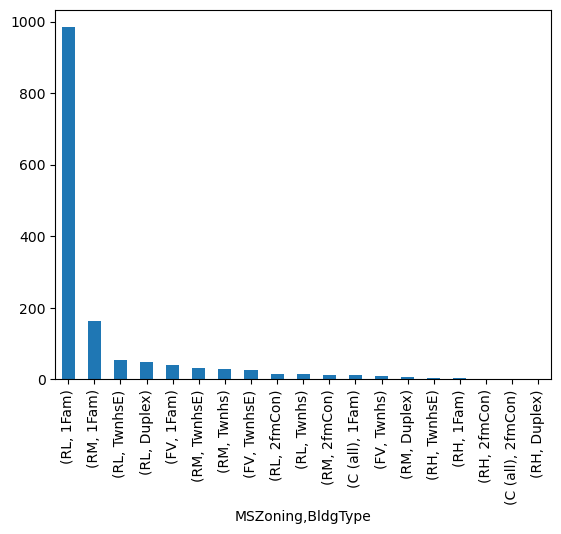

In [55]:
SalePrice[["MSZoning", "BldgType"]].value_counts().plot(kind = "bar")

In [40]:
zona_tipo = SalePrice.groupby(['MSZoning',"BldgType"]).agg(len).reset_index()


In [41]:
zona_tipo

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,C (all),1Fam,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
1,C (all),2fmCon,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,FV,1Fam,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
3,FV,Twnhs,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,FV,TwnhsE,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
5,RH,1Fam,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,RH,2fmCon,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,RH,Duplex,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,RH,TwnhsE,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,RL,1Fam,984,984,984,984,984,984,984,984,...,984,984,984,984,984,984,984,984,984,984


Y sumar


In [42]:
SalePrice_num["BldgType"] = SalePrice["BldgType"]

In [43]:
zona_tipo_suma = SalePrice_num.groupby(['MSZoning',"BldgType"]).agg("sum").reset_index()


In [44]:
zona_tipo_suma

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),1Fam,29117,560,687.0,95755,49,68,24929,25487,...,2062.0,154,666,1000,86,0,0,0,90,26103
1,C (all),2fmCon,5473,380,125.0,17250,10,12,3846,3957,...,0.0,0,0,133,0,0,0,0,16,4013
2,FV,1Fam,79975,1500,2811.0,359197,290,195,78181,78197,...,24771.0,3504,4991,36,224,650,0,0,261,78311
3,FV,Twnhs,20329,1600,248.0,24639,68,50,20013,20017,...,4886.0,358,745,0,0,0,0,0,73,20081
4,FV,TwnhsE,50684,3440,634.0,94999,184,125,50080,50088,...,13149.0,1114,2498,0,0,94,0,0,129,50203
5,RH,1Fam,4850,100,220.0,27722,15,15,5819,5861,...,1409.0,261,0,135,0,120,0,0,17,6029
6,RH,2fmCon,4435,380,118.0,12478,11,13,3855,3900,...,890.0,56,144,0,0,0,0,0,13,4016
7,RH,Duplex,1594,90,60.0,7200,4,6,1967,1967,...,0.0,0,0,0,0,0,0,500,2,2010
8,RH,TwnhsE,8676,480,111.0,29687,25,20,7999,8000,...,2087.0,535,272,0,0,0,0,0,32,8030
9,RL,1Fam,2165928,39620,60840.0,11000097,6099,5467,1944520,1953399,...,495554.0,107241,49142,20411,1556,19993,2545,75495,5994,1975601


# Verticalización

- Verticalizar un DataFrame en pandas generalmente se refiere a transformar datos 
  
  de un formato de tabla a lo ancho (horizontal) a un formato a lo largo (vertical).

- Se suele realizar convirtiendo varias columnas en valores categóricos en una nueva 
  
  columna. Los datos que se guardaran en esas columnas eliminadas se incorporarán de arriba a abajo en la segunda nueva 
  
  columna creada.

- Esto se puede lograr utilizando las funciones `melt` y `stack` de pandas.

## `melt`

In [45]:
import pandas as pd


In [46]:

# Crear DataFrame de ejemplo
datos = pd.DataFrame({
    'DNI': ["14543234L", "23445853Z", "17754679L"],
    'Matemáticas': [9.0, 8.0, 8.5],
    'Física': [7.0, 8.5, 9.1],
    'Química': [6.0, 5.5, 7.3]
})


In [47]:
datos

,DNI,Matemáticas,Física,Química
0,14543234L,9.0,7.0,6.0
1,23445853Z,8.0,8.5,5.5
2,17754679L,8.5,9.1,7.3


- Ahora la columna DNI ya no es de valores únicos. 

- Sí lo será la combinación DNI - Asignatura

- Puesto que se crean dos columnas, debemos dar dos nombres nuevos 
  
  de columna, una para las variables que van a desaparecer y otra 
  
  para los valores que vamos a concatenar verticalmente. 
  
  (Si no las llamará `variable` y `value` automáticamente)

In [48]:
#la idea es agrupar las notas en una sola columna
#                             indice          columan que agrupa    el valor de la columna
datos_vert = pd.melt(datos, id_vars=['DNI'], var_name='Asignatura', value_name='Notas')


In [49]:
datos_vert

,DNI,Asignatura,Notas
0,14543234L,Matemáticas,9.0
1,23445853Z,Matemáticas,8.0
2,17754679L,Matemáticas,8.5
3,14543234L,Física,7.0
4,23445853Z,Física,8.5
5,17754679L,Física,9.1
6,14543234L,Química,6.0
7,23445853Z,Química,5.5
8,17754679L,Química,7.3


aqui sacamos la media de la materia


In [53]:

datos_vert.groupby("Asignatura").agg({"Notas": "mean"})

,Notas
Asignatura,
Física,8.200000
Matemáticas,8.500000
Química,6.266667


aqui sacamos la media del alumno


In [54]:
datos_vert.groupby("DNI").agg({"Notas": "mean"})

,Notas
DNI,
14543234L,7.333333
17754679L,8.300000
23445853Z,7.333333


## `stack`

Si no tenemos una columna de identificadores y queremos usar el índice podemos usar `stack`.

In [52]:
import pandas as pd


In [55]:

# Crear DataFrame de ejemplo
datos = pd.DataFrame({
    'Matemáticas': [9.0, 8.0, 8.5],
    'Física': [7.0, 8.5, 9.1],
    'Química': [6.0, 5.5, 7.3]
})


In [56]:

datos

,Matemáticas,Física,Química
0,9.0,7.0,6.0
1,8.0,8.5,5.5
2,8.5,9.1,7.3


Obtenemos un objeto de tipo `Series` con doble índice. Las columnas se convertirán en el índice interno.

In [57]:
# Verticalizar el DataFrame usando stack
datos_stacked = datos.stack()


In [58]:
print(type(datos_stacked))


<class 'pandas.core.series.Series'>


In [59]:
datos_stacked

0  Matemáticas    9.0
   Física         7.0
   Química        6.0
1  Matemáticas    8.0
   Física         8.5
   Química        5.5
2  Matemáticas    8.5
   Física         9.1
   Química        7.3
dtype: float64

Con `reset_index` el índice doble se promocionara a columnas para que sean los nuevos indicadores únicos de la tabla.

In [60]:
# Verticalizar el DataFrame usando stack
datos_stacked = datos.stack().reset_index()


In [61]:
datos_stacked.columns = ['id', 'Asignatura', 'Nota']


In [62]:
datos_stacked

,id,Asignatura,Nota
0,0,Matemáticas,9.0
1,0,Física,7.0
2,0,Química,6.0
3,1,Matemáticas,8.0
4,1,Física,8.5
5,1,Química,5.5
6,2,Matemáticas,8.5
7,2,Física,9.1
8,2,Química,7.3


## `pivot`

Realiza el paso contrario de `melt` y `stack`

In [68]:
Normal = datos_stacked.pivot(index='id', columns='Asignatura', values='Nota')


In [69]:
Normal

Asignatura,Física,Matemáticas,Química
id,,,
0,7.0,9.0,6.0
1,8.5,8.0,5.5
2,9.1,8.5,7.3


In [ ]:
#Normal = datos_stacked.pivot(index='id', columns='Asignatura')['Nota']


In [70]:
Normal.columns

Index(['Física', 'Matemáticas', 'Química'], dtype='object', name='Asignatura')

In [71]:
print(Normal.columns, Normal.index)


Index(['Física', 'Matemáticas', 'Química'], dtype='object', name='Asignatura') Index([0, 1, 2], dtype='int64', name='id')


In [72]:

Normal.columns.name = None


In [73]:
Normal.index.name = None

In [74]:
Normal

,Física,Matemáticas,Química
0,7.0,9.0,6.0
1,8.5,8.0,5.5
2,9.1,8.5,7.3


In [75]:
Normal["Física"]

0    7.0
1    8.5
2    9.1
Name: Física, dtype: float64

In [76]:
Normal.iloc[2,:]

Física         9.1
Matemáticas    8.5
Química        7.3
Name: 2, dtype: float64

### Ejemplo de pivotado con los datos de SalePrice

In [77]:
zona_tipo_suma

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),1Fam,29117,560,687.0,95755,49,68,24929,25487,...,2062.0,154,666,1000,86,0,0,0,90,26103
1,C (all),2fmCon,5473,380,125.0,17250,10,12,3846,3957,...,0.0,0,0,133,0,0,0,0,16,4013
2,FV,1Fam,79975,1500,2811.0,359197,290,195,78181,78197,...,24771.0,3504,4991,36,224,650,0,0,261,78311
3,FV,Twnhs,20329,1600,248.0,24639,68,50,20013,20017,...,4886.0,358,745,0,0,0,0,0,73,20081
4,FV,TwnhsE,50684,3440,634.0,94999,184,125,50080,50088,...,13149.0,1114,2498,0,0,94,0,0,129,50203
5,RH,1Fam,4850,100,220.0,27722,15,15,5819,5861,...,1409.0,261,0,135,0,120,0,0,17,6029
6,RH,2fmCon,4435,380,118.0,12478,11,13,3855,3900,...,890.0,56,144,0,0,0,0,0,13,4016
7,RH,Duplex,1594,90,60.0,7200,4,6,1967,1967,...,0.0,0,0,0,0,0,0,500,2,2010
8,RH,TwnhsE,8676,480,111.0,29687,25,20,7999,8000,...,2087.0,535,272,0,0,0,0,0,32,8030
9,RL,1Fam,2165928,39620,60840.0,11000097,6099,5467,1944520,1953399,...,495554.0,107241,49142,20411,1556,19993,2545,75495,5994,1975601


In [78]:
Normal2 = zona_tipo_suma.pivot(index='MSZoning', columns='BldgType', values='LotArea')


In [79]:
Normal2

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
MSZoning,,,,,
C (all),95755.0,17250.0,NaN,NaN,NaN
FV,359197.0,NaN,NaN,24639.0,94999.0
RH,27722.0,12478.0,7200.0,NaN,29687.0
RL,11000097.0,174779.0,454953.0,40145.0,309722.0
RM,1228047.0,110301.0,54296.0,51320.0,109355.0


# Verticalización por varias variables

In [80]:
# Crear DataFrame de ejemplo
data = {
    'tienda': ['Tienda A', 'Tienda B', 'Tienda C'],
    'producto': ['Producto 1', 'Producto 2', 'Producto 3'],
    'ventas_ene': [150, 200, 250],
    'ventas_feb': [160, 210, 260],
    'ventas_mar': [170, 220, 270]
}


In [81]:
df = pd.DataFrame(data)


In [82]:
df

,tienda,producto,ventas_ene,ventas_feb,ventas_mar
0,Tienda A,Producto 1,150,160,170
1,Tienda B,Producto 2,200,210,220
2,Tienda C,Producto 3,250,260,270


## `melt`

In [83]:
df_vert = pd.melt(df, id_vars=['tienda', 'producto'], var_name='mes', value_name='ventas')


In [84]:
df_vert

,tienda,producto,mes,ventas
0,Tienda A,Producto 1,ventas_ene,150
1,Tienda B,Producto 2,ventas_ene,200
2,Tienda C,Producto 3,ventas_ene,250
3,Tienda A,Producto 1,ventas_feb,160
4,Tienda B,Producto 2,ventas_feb,210
5,Tienda C,Producto 3,ventas_feb,260
6,Tienda A,Producto 1,ventas_mar,170
7,Tienda B,Producto 2,ventas_mar,220
8,Tienda C,Producto 3,ventas_mar,270


quiero quitar del mes en la variables la palabra ventas_

In [85]:
df_vert["mes"] = df_vert["mes"].str.replace("ventas_", "")


In [86]:
df_vert

,tienda,producto,mes,ventas
0,Tienda A,Producto 1,ene,150
1,Tienda B,Producto 2,ene,200
2,Tienda C,Producto 3,ene,250
3,Tienda A,Producto 1,feb,160
4,Tienda B,Producto 2,feb,210
5,Tienda C,Producto 3,feb,260
6,Tienda A,Producto 1,mar,170
7,Tienda B,Producto 2,mar,220
8,Tienda C,Producto 3,mar,270


## `pivot`

In [95]:
# Convertir el DataFrame de formato largo a formato ancho
df_wide = df_vert.pivot(index=['tienda', 'producto'], columns='mes', values='ventas').reset_index()


In [96]:
df_wide

mes,tienda,producto,ene,feb,mar
0,Tienda A,Producto 1,150,160,170
1,Tienda B,Producto 2,200,210,220
2,Tienda C,Producto 3,250,260,270


In [97]:
df_wide.columns.name = None  # Quitar el nombre de las columnas


In [98]:

df_wide

,tienda,producto,ene,feb,mar
0,Tienda A,Producto 1,150,160,170
1,Tienda B,Producto 2,200,210,220
2,Tienda C,Producto 3,250,260,270


In [90]:
SalePrice.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Ejercicio con SalePrice

Construye un Dataframe agregando los datos de SalePrice utilizando dos variables categóricas.

(Por ejemplo LotShape y LandContour)

In [114]:
SP = SalePrice[["LotShape", "LandContour", "YearRemodAdd", "YearBuilt", "LotArea", "OpenPorchSF"]]

In [115]:
SP.head()

,LotShape,LandContour,YearRemodAdd,YearBuilt,LotArea,OpenPorchSF
0,Reg,Lvl,1961,1961,11622,0
1,IR1,Lvl,1958,1958,14267,36
2,IR1,Lvl,1998,1997,13830,34
3,IR1,Lvl,1998,1998,9978,36
4,IR1,HLS,1992,1992,5005,82




- En el agregado deben aparecer la media del año de remodelación 
    
    `YearRemodAdd` y el año de construcción `YearBuilt` y 
    
     la suma del Área del lote `LotArea` y el área del porche abierto `OpenPorchSF`.

- (Intenta que el año de construcción medio aparezca como un número entero con una función personalizada)


In [136]:
SP= SP.groupby(["LotShape", "LandContour"]).agg({"YearRemodAdd": "mean", "YearBuilt": "mean", "LotArea": "sum", "OpenPorchSF": "sum"}).reset_index()

In [137]:
SP

,LotShape,LandContour,YearRemodAdd,YearBuilt,LotArea,OpenPorchSF
0,IR1,Bnk,1976.800000,1960.866667,207159,1010
1,IR1,HLS,1996.509804,1990.509804,546863,3625
2,IR1,Low,1973.300000,1964.500000,259301,393
3,IR1,Lvl,1989.860294,1985.463235,4478811,22849
4,IR2,Bnk,2002.000000,1915.000000,5775,24
5,IR2,HLS,1951.000000,1951.000000,13108,24
6,IR2,Low,1997.000000,1997.000000,31314,81
7,IR2,Lvl,1997.451613,1995.161290,414116,1694
8,IR3,Bnk,2000.000000,1902.000000,5852,188
9,IR3,Lvl,1995.600000,1993.000000,93793,370


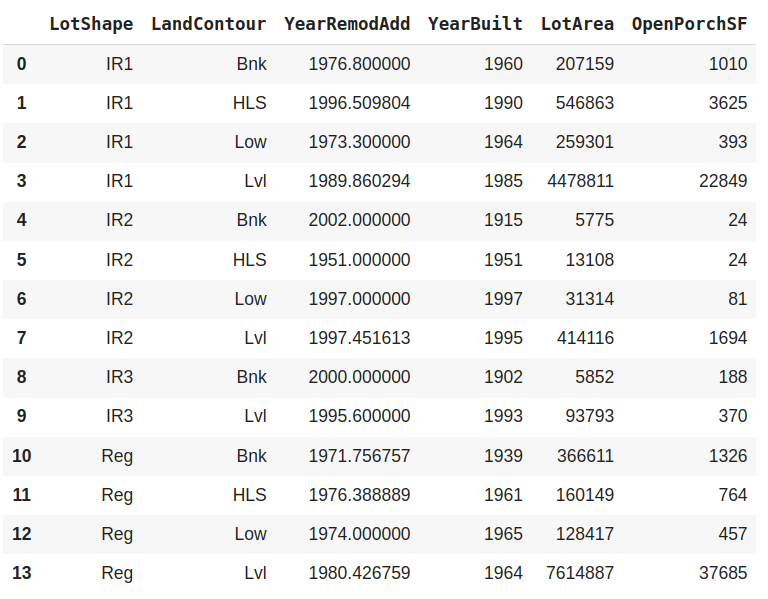

- A continuación, viendo el agregado, podemos considerar que `LotShape` podría ser la 
  
  columna categórica que se obtiene al verticalizar una tabla y 
  
  que `LotArea` son los values de la tabla original.

Deshaz esa hipotética verticalización con `pivot`


In [141]:
#SP1 = SP.pivot(index=['LandContour'], columns='LotShape', values='LotArea').reset_index()
SP1 = SP.pivot(index='LotShape',columns='LandContour',values='LotArea')


In [142]:
SP1

LandContour,Bnk,HLS,Low,Lvl
LotShape,,,,
IR1,207159.0,546863.0,259301.0,4478811.0
IR2,5775.0,13108.0,31314.0,414116.0
IR3,5852.0,NaN,NaN,93793.0
Reg,366611.0,160149.0,128417.0,7614887.0


Debe quedar algo así:

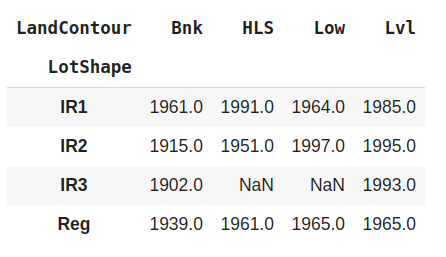

In [144]:
SP1.stack().reset_index()

,LotShape,LandContour,0
0,IR1,Bnk,207159.0
1,IR1,HLS,546863.0
2,IR1,Low,259301.0
3,IR1,Lvl,4478811.0
4,IR2,Bnk,5775.0
5,IR2,HLS,13108.0
6,IR2,Low,31314.0
7,IR2,Lvl,414116.0
8,IR3,Bnk,5852.0
9,IR3,Lvl,93793.0


In [148]:
SP2 = SP1.reset_index()

In [149]:
SP2

LandContour,LotShape,Bnk,HLS,Low,Lvl
0,IR1,207159.0,546863.0,259301.0,4478811.0
1,IR2,5775.0,13108.0,31314.0,414116.0
2,IR3,5852.0,NaN,NaN,93793.0
3,Reg,366611.0,160149.0,128417.0,7614887.0


In [150]:
SP2.melt(id_vars=['LotShape'], var_name='LandContour', value_name='LotArea')

,LotShape,LandContour,LotArea
0,IR1,Bnk,207159.0
1,IR2,Bnk,5775.0
2,IR3,Bnk,5852.0
3,Reg,Bnk,366611.0
4,IR1,HLS,546863.0
5,IR2,HLS,13108.0
6,IR3,HLS,NaN
7,Reg,HLS,160149.0
8,IR1,Low,259301.0
9,IR2,Low,31314.0
